In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import random
import os
import sklearn
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet_v3 import MobileNetV3
from keras import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sohamdas27","key":"df670fa2a79d02569e716f265057a319"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04          13664        385  1.0              
narayan63/netflix-popular-movies-dataset                       Netflix popular movies dataset                        1MB  2022-09-24 08:23:22           1645         37  0.9411765        
anushabellam/trending-videos-on-youtube                        Trending videos on Youtube                           29KB  2022-09-20 12:12:35           1160         34  1.0              
whenamancodes/student-performance                              St

In [8]:
! kaggle datasets download -d chiragsoni/ferdata

 90% 54.0M/60.3M [00:01<00:00, 53.3MB/s]
100% 60.3M/60.3M [00:01<00:00, 43.7MB/s]


In [9]:
!unzip ferdata.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [10]:
emotions=['angry','disgust','fear','happy','neutral','sad','surprise']

In [11]:
data=[]

In [12]:
for i in emotions:
    
    path=os.path.join('/content/train',i)
    label=emotions.index(i)
    for file in os.listdir(path):
        img_path=os.path.join(path,file)
        img=cv2.imread(img_path)
        img=cv2.resize(img,(48,48))
        data.append([img,label]) 

In [13]:
len(data)

28709

In [14]:
data[0]

[array([[[ 32,  32,  32],
         [ 53,  53,  53],
         [ 76,  76,  76],
         ...,
         [135, 135, 135],
         [140, 140, 140],
         [136, 136, 136]],
 
        [[ 46,  46,  46],
         [ 67,  67,  67],
         [ 85,  85,  85],
         ...,
         [126, 126, 126],
         [126, 126, 126],
         [123, 123, 123]],
 
        [[ 54,  54,  54],
         [ 81,  81,  81],
         [ 96,  96,  96],
         ...,
         [112, 112, 112],
         [110, 110, 110],
         [106, 106, 106]],
 
        ...,
 
        [[ 73,  73,  73],
         [ 80,  80,  80],
         [ 90,  90,  90],
         ...,
         [228, 228, 228],
         [229, 229, 229],
         [224, 224, 224]],
 
        [[ 53,  53,  53],
         [ 70,  70,  70],
         [ 98,  98,  98],
         ...,
         [227, 227, 227],
         [227, 227, 227],
         [228, 228, 228]],
 
        [[ 52,  52,  52],
         [ 74,  74,  74],
         [ 95,  95,  95],
         ...,
         [221, 221, 221],
  

In [15]:
random.shuffle(data)

In [16]:
data[0]

[array([[[140, 140, 140],
         [138, 138, 138],
         [137, 137, 137],
         ...,
         [ 81,  81,  81],
         [ 85,  85,  85],
         [ 84,  84,  84]],
 
        [[139, 139, 139],
         [138, 138, 138],
         [137, 137, 137],
         ...,
         [ 75,  75,  75],
         [ 80,  80,  80],
         [ 76,  76,  76]],
 
        [[134, 134, 134],
         [134, 134, 134],
         [134, 134, 134],
         ...,
         [ 57,  57,  57],
         [ 63,  63,  63],
         [ 69,  69,  69]],
 
        ...,
 
        [[214, 214, 214],
         [232, 232, 232],
         [223, 223, 223],
         ...,
         [  3,   3,   3],
         [  0,   0,   0],
         [  5,   5,   5]],
 
        [[233, 233, 233],
         [232, 232, 232],
         [218, 218, 218],
         ...,
         [  0,   0,   0],
         [ 50,  50,  50],
         [163, 163, 163]],
 
        [[230, 230, 230],
         [233, 233, 233],
         [223, 223, 223],
         ...,
         [  5,   5,   5],
  

In [17]:
X=[]
y=[]
for image,label in data:
    X.append(image)
    y.append(label)

In [18]:
X

[array([[[140, 140, 140],
         [138, 138, 138],
         [137, 137, 137],
         ...,
         [ 81,  81,  81],
         [ 85,  85,  85],
         [ 84,  84,  84]],
 
        [[139, 139, 139],
         [138, 138, 138],
         [137, 137, 137],
         ...,
         [ 75,  75,  75],
         [ 80,  80,  80],
         [ 76,  76,  76]],
 
        [[134, 134, 134],
         [134, 134, 134],
         [134, 134, 134],
         ...,
         [ 57,  57,  57],
         [ 63,  63,  63],
         [ 69,  69,  69]],
 
        ...,
 
        [[214, 214, 214],
         [232, 232, 232],
         [223, 223, 223],
         ...,
         [  3,   3,   3],
         [  0,   0,   0],
         [  5,   5,   5]],
 
        [[233, 233, 233],
         [232, 232, 232],
         [218, 218, 218],
         ...,
         [  0,   0,   0],
         [ 50,  50,  50],
         [163, 163, 163]],
 
        [[230, 230, 230],
         [233, 233, 233],
         [223, 223, 223],
         ...,
         [  5,   5,   5],
  

In [19]:
X=np.array(X)

In [20]:
X

array([[[[140, 140, 140],
         [138, 138, 138],
         [137, 137, 137],
         ...,
         [ 81,  81,  81],
         [ 85,  85,  85],
         [ 84,  84,  84]],

        [[139, 139, 139],
         [138, 138, 138],
         [137, 137, 137],
         ...,
         [ 75,  75,  75],
         [ 80,  80,  80],
         [ 76,  76,  76]],

        [[134, 134, 134],
         [134, 134, 134],
         [134, 134, 134],
         ...,
         [ 57,  57,  57],
         [ 63,  63,  63],
         [ 69,  69,  69]],

        ...,

        [[214, 214, 214],
         [232, 232, 232],
         [223, 223, 223],
         ...,
         [  3,   3,   3],
         [  0,   0,   0],
         [  5,   5,   5]],

        [[233, 233, 233],
         [232, 232, 232],
         [218, 218, 218],
         ...,
         [  0,   0,   0],
         [ 50,  50,  50],
         [163, 163, 163]],

        [[230, 230, 230],
         [233, 233, 233],
         [223, 223, 223],
         ...,
         [  5,   5,   5],
        

In [21]:
X.shape

(28709, 48, 48, 3)

In [22]:
y=np.array(y)
y.shape

(28709,)

In [23]:
y

array([4, 0, 6, ..., 3, 4, 3])

In [24]:
y[8]

3

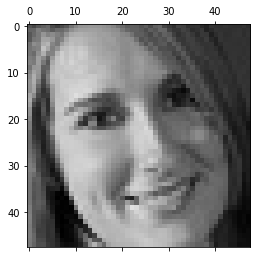

In [25]:
plt.matshow(X[8])

In [26]:
values=np.unique(y,return_counts=True)
values

(array([0, 1, 2, 3, 4, 5, 6]),
 array([3995,  436, 4097, 7215, 4965, 4830, 3171]))

In [27]:
values[1]

array([3995,  436, 4097, 7215, 4965, 4830, 3171])

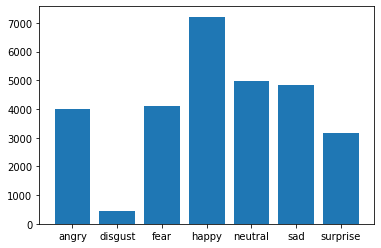

In [28]:
plt.bar(emotions,values[1])
plt.show()

In [36]:
data_aug_train=ImageDataGenerator(rescale=1.0/255,
                            rotation_range=30,
                            shear_range=0.2,
                            zoom_range=0.15,
                           horizontal_flip=True,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            fill_mode='nearest')

In [37]:
data_aug_test=ImageDataGenerator(rescale=1.0/255)

In [98]:
train_gen=data_aug_train.flow_from_directory('/content/train',
                                       target_size=(48,48),
                                       batch_size=32,
                                       class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [90]:
test_gen=data_aug_test.flow_from_directory('/content/test',
                                          target_size=(48,48),
                                          batch_size=32,
                                          class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [155]:
model=Sequential([Conv2D(32,kernel_size=(3,3),padding='same',input_shape=(48,48,3),activation='leaky_relu'),
                 MaxPooling2D((2,2)),
                 Conv2D(64,kernel_size=(3,3),padding='same',activation='leaky_relu'),
                 MaxPooling2D((2,2)),
                 Conv2D(64,kernel_size=(3,3),padding='same',activation='leaky_relu'),
                 MaxPooling2D((2,2)),
                 Conv2D(128,kernel_size=(3,3),padding='same',activation='leaky_relu'),
                 Flatten(),
                 Dense(128,activation='leaky_relu'),
                 Dense(128,activation='leaky_relu'),
                 Dense(7,activation='softmax')
                 ])

In [156]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 6, 6, 64)        

In [157]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [158]:
batch_size=32

In [159]:
model.fit(train_gen,
          steps_per_epoch=28709//batch_size,
          validation_data=test_gen,
          validation_steps=7178//batch_size,
          epochs=100)

Epoch 1/100
897/897 [==============================] - 38s 41ms/step - loss: 1.7926 - accuracy: 0.2569 - val_loss: 1.7252 - val_accuracy: 0.2836
Epoch 2/100
897/897 [==============================] - 37s 42ms/step - loss: 1.7314 - accuracy: 0.2918 - val_loss: 1.6540 - val_accuracy: 0.3193
Epoch 3/100
897/897 [==============================] - 37s 41ms/step - loss: 1.6431 - accuracy: 0.3399 - val_loss: 1.4960 - val_accuracy: 0.4448
Epoch 4/100
897/897 [==============================] - 36s 40ms/step - loss: 1.5071 - accuracy: 0.4102 - val_loss: 1.3700 - val_accuracy: 0.4794
Epoch 5/100
897/897 [==============================] - 37s 41ms/step - loss: 1.4307 - accuracy: 0.4470 - val_loss: 1.2569 - val_accuracy: 0.5191
Epoch 6/100
897/897 [==============================] - 36s 40ms/step - loss: 1.3762 - accuracy: 0.4705 - val_loss: 1.2689 - val_accuracy: 0.5119
Epoch 7/100
897/897 [==============================] - 36s 41ms/step - loss: 1.3438 - accuracy: 0.4868 - val_loss: 1.2354 - val_ac

In [161]:
y_pred=model.predict(test_gen,
                     steps=7178//batch_size)

In [162]:
y_pred

array([[8.73293638e-01, 1.89175640e-04, 1.07991256e-01, ...,
        1.37441166e-04, 2.67236098e-03, 1.05481157e-02],
       [1.84604153e-02, 4.80536582e-05, 2.27991422e-03, ...,
        7.63208926e-01, 4.08713743e-02, 2.73637706e-04],
       [6.84238136e-01, 4.66642808e-03, 2.33396277e-01, ...,
        3.08665843e-03, 1.10622374e-02, 5.51059991e-02],
       ...,
       [3.92872316e-04, 2.85674105e-05, 5.22269751e-04, ...,
        5.36233652e-03, 7.76094093e-04, 7.32566789e-03],
       [8.66758823e-03, 8.60927685e-05, 1.31667117e-02, ...,
        9.08408284e-01, 5.84705621e-02, 3.24882078e-03],
       [4.56480822e-03, 8.77773200e-05, 6.15268528e-01, ...,
        6.08035438e-02, 2.56878078e-01, 5.80201596e-02]], dtype=float32)

In [163]:
y_pred[0]

array([8.73293638e-01, 1.89175640e-04, 1.07991256e-01, 5.16802538e-03,
       1.37441166e-04, 2.67236098e-03, 1.05481157e-02], dtype=float32)

In [173]:
img=cv2.imread('/content/happy1.jpg')
img=cv2.resize(img,(48,48))

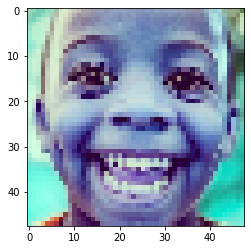

In [174]:
plt.imshow(img)

In [175]:
img=np.reshape(img,(1,48,48,3))

In [176]:
img

array([[[[157, 211, 182],
         [143, 212, 185],
         [119, 202, 177],
         ...,
         [149, 172, 134],
         [140, 166, 126],
         [ 99, 123,  79]],

        [[149, 205, 182],
         [122, 199, 171],
         [120, 205, 183],
         ...,
         [146, 168, 133],
         [124, 140,  97],
         [189, 214, 170]],

        [[135, 207, 185],
         [121, 208, 182],
         [154, 226, 196],
         ...,
         [103, 122,  97],
         [144, 163, 124],
         [197, 226, 185]],

        ...,

        [[ 93, 251, 228],
         [116, 251, 228],
         [131, 252, 231],
         ...,
         [ 69, 232, 212],
         [ 82, 235, 215],
         [ 89, 239, 219]],

        [[110, 249, 226],
         [127, 244, 221],
         [154, 243, 220],
         ...,
         [107, 229, 211],
         [108, 234, 215],
         [105, 239, 219]],

        [[145, 238, 213],
         [197, 243, 213],
         [231, 240, 197],
         ...,
         [131, 230, 211],
        

In [177]:
img=img/255.0

In [178]:
img

array([[[[0.61568627, 0.82745098, 0.71372549],
         [0.56078431, 0.83137255, 0.7254902 ],
         [0.46666667, 0.79215686, 0.69411765],
         ...,
         [0.58431373, 0.6745098 , 0.5254902 ],
         [0.54901961, 0.65098039, 0.49411765],
         [0.38823529, 0.48235294, 0.30980392]],

        [[0.58431373, 0.80392157, 0.71372549],
         [0.47843137, 0.78039216, 0.67058824],
         [0.47058824, 0.80392157, 0.71764706],
         ...,
         [0.57254902, 0.65882353, 0.52156863],
         [0.48627451, 0.54901961, 0.38039216],
         [0.74117647, 0.83921569, 0.66666667]],

        [[0.52941176, 0.81176471, 0.7254902 ],
         [0.4745098 , 0.81568627, 0.71372549],
         [0.60392157, 0.88627451, 0.76862745],
         ...,
         [0.40392157, 0.47843137, 0.38039216],
         [0.56470588, 0.63921569, 0.48627451],
         [0.77254902, 0.88627451, 0.7254902 ]],

        ...,

        [[0.36470588, 0.98431373, 0.89411765],
         [0.45490196, 0.98431373, 0.89411765]

In [179]:
model.predict(img)

array([[2.5103616e-06, 3.9813393e-09, 8.9657542e-06, 9.9805319e-01,
        4.6801835e-04, 1.4550940e-05, 1.4528588e-03]], dtype=float32)

In [180]:
np.argmax(model.predict(img))

3

In [181]:
emotions=['angry','disgust','fear','happy','neutral','sad','surprise']

In [182]:
model.save('Model (1).h5')